In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import show
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [29]:
df_catalysis_dataset = pd.read_csv("../data/OCM-data.csv", index_col=0, header=0)
df_catalysis_dataset.dtypes

M1                    object
M1_atom_number         int64
M2                    object
M2_atom_number         int64
M3                    object
M3_atom_number         int64
Support               object
Support_ID             int64
M2_mol               float64
M3_mol               float64
M1_mol_percentage      int64
M2_mol_percentage      int64
M3_mol_percentage      int64
Temp                   int64
Total_flow             int64
Ar_flow              float64
CH4_flow             float64
O2_flow              float64
CT                   float64
CH4/O2                 int64
CH4_conv             float64
C2y                  float64
C2H6y                float64
C2H4y                float64
COy                  float64
CO2y                 float64
C2s                  float64
C2H6s                float64
C2H4s                float64
COs                  float64
CO2s                 float64
dtype: object

In [30]:
x = df_catalysis_dataset[["Ar_flow", "CH4_flow", "O2_flow", "CT", "M2_mol", "M3_mol"]]
print(x)

              Ar_flow  CH4_flow  O2_flow    CT  M2_mol  M3_mol
Name                                                          
Mn-Na2WO4/BN      1.5       5.7      2.8  0.75    0.37   0.185
Mn-Na2WO4/BN      2.3       8.5      4.3  0.50    0.37   0.185
Mn-Na2WO4/BN      3.0      11.3      5.7  0.38    0.37   0.185
Mn-Na2WO4/BN      1.5       6.4      2.1  0.75    0.37   0.185
Mn-Na2WO4/BN      2.3       9.6      3.2  0.50    0.37   0.185
...               ...       ...      ...   ...     ...     ...
Na/SiO2          10.5       3.6      0.9  0.50    0.37   0.000
Na/SiO2          14.0       4.8      1.2  0.38    0.37   0.000
Na/SiO2           7.0       2.6      0.4  0.75    0.37   0.000
Na/SiO2          10.5       3.9      0.6  0.50    0.37   0.000
Na/SiO2          14.0       5.1      0.9  0.38    0.37   0.000

[12708 rows x 6 columns]


In [31]:
# CH4_conv, C2y, COy
y = df_catalysis_dataset["COy"].values
print(y)

[30.82 31.29 21.62 ...  1.5   1.61  2.15]


In [32]:
pre_process = PolynomialFeatures(degree=1)

In [33]:
X_poly = pre_process.fit_transform(x)
X_poly

array([[ 1.   ,  1.5  ,  5.7  , ...,  0.75 ,  0.37 ,  0.185],
       [ 1.   ,  2.3  ,  8.5  , ...,  0.5  ,  0.37 ,  0.185],
       [ 1.   ,  3.   , 11.3  , ...,  0.38 ,  0.37 ,  0.185],
       ...,
       [ 1.   ,  7.   ,  2.6  , ...,  0.75 ,  0.37 ,  0.   ],
       [ 1.   , 10.5  ,  3.9  , ...,  0.5  ,  0.37 ,  0.   ],
       [ 1.   , 14.   ,  5.1  , ...,  0.38 ,  0.37 ,  0.   ]])

In [34]:
ml = LinearRegression()
ml.fit(X_poly, y)

LinearRegression()

In [35]:
y_pred = ml.predict(X_poly)
y_pred

array([15.55622521, 18.34185341, 21.06784424, ...,  6.15058019,
        3.72677192,  2.28829108])

Text(0, 0.5, 'Predicted')

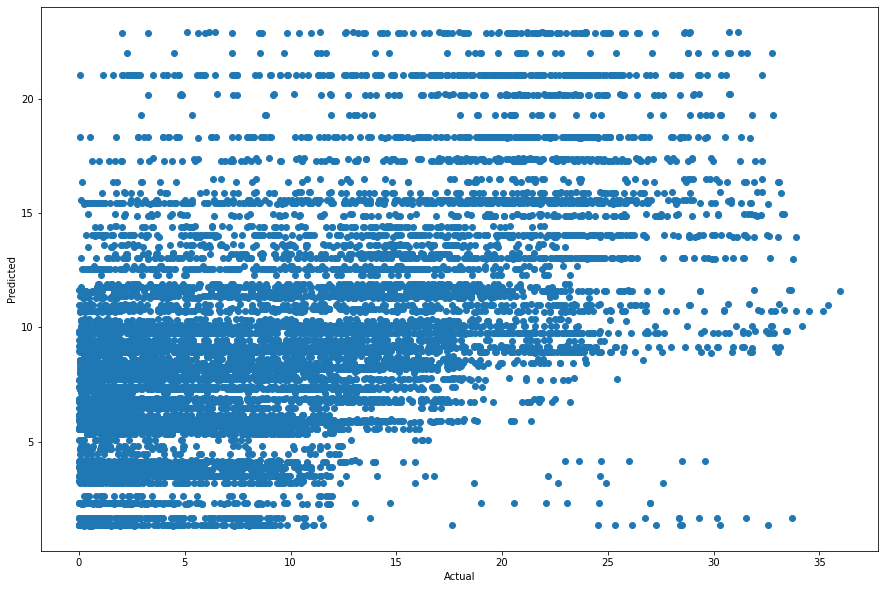

In [36]:
plt.figure(figsize=(15, 10))
plt.scatter(y, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.plot(x, y_pred)